In [1]:
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
%precision 3
pd.options.display.precision = 3

In [3]:
os.getcwd()

'C:\\Users\\15U40N\\Documents\\NH-main\\live'

In [4]:
os.chdir('../data')

In [5]:
os.listdir()

['APT_List_Seoul_2021.csv',
 'APT_List_Seoul_2021.xlsx',
 'APT_List_Seoul_2021.z',
 'APT_Mean_Price_Dong_2021.xlsx',
 'APT_Price_Seoul_2021.csv',
 'APT_Price_Seoul_2021.xlsx',
 'KBO_Hitters_2021.csv',
 'KBO_Hitters_2021.xlsx',
 'Naver_APT_Detail_Seoul.csv',
 'Naver_APT_Detail_Seoul.xlsx']

In [6]:
df = pd.read_csv('https://bit.ly/Used_Cars_Price')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1275 non-null   int64 
 1   Age        1275 non-null   int64 
 2   KM         1275 non-null   int64 
 3   FuelType   1275 non-null   object
 4   HP         1275 non-null   int64 
 5   MetColor   1275 non-null   int64 
 6   Automatic  1275 non-null   int64 
 7   CC         1275 non-null   int64 
 8   Doors      1275 non-null   int64 
 9   Weight     1275 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 99.7+ KB


In [8]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [9]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [10]:
cols = ['MetColor', 'Automatic']

In [12]:
df[cols] = df[cols].astype(str)

In [13]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

In [14]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1275.000,1275.000,1275.000,1275.000,1275.000,1275.000,1275.000
mean,9690.233,60.603,73692.409,100.397,1559.513,3.998,1062.692
std,2029.844,13.694,35949.783,13.111,184.690,0.951,39.790
min,4350.000,19.000,1.000,69.000,1300.000,2.000,1000.000
25%,8250.000,51.000,48948.500,86.000,1400.000,3.000,1035.000
50%,9450.000,63.000,67451.000,110.000,1600.000,4.000,1060.000
75%,10950.000,71.500,90325.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1615.000


In [16]:
df.sort_values(by = ['KM'], ascending = False).tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
7,12950,29,9750,Petrol,97,1,0,1400,3,1100
18,14900,30,7000,Petrol,97,1,0,1400,5,1100
432,11250,47,5309,Petrol,110,1,1,1600,3,1070
1267,6950,76,1,Petrol,110,0,0,1600,5,1114
433,7500,50,1,Diesel,90,1,0,2000,3,1260


In [20]:
df = df[df['KM'].gt(1)].reset_index(drop = True)

In [18]:
df.shape[0]

1273

In [19]:
df.describe(include = object)

,FuelType,MetColor,Automatic
count,1273,1273,1273
unique,3,2,2
top,Petrol,1,0
freq,1128,842,1203


In [22]:
df['FuelType'].value_counts().sort_index()

CNG         17
Diesel     128
Petrol    1128
Name: FuelType, dtype: int64

In [23]:
df['FuelType'].value_counts(normalize = True).sort_index()

CNG       0.013
Diesel    0.101
Petrol    0.886
Name: FuelType, dtype: float64

In [24]:
from GraphicSetting import *

In [29]:
import HelloDataScience as hds

In [31]:
df['Price'].describe()[['min', 'max']]

min     4350.0
max    15950.0
Name: Price, dtype: float64

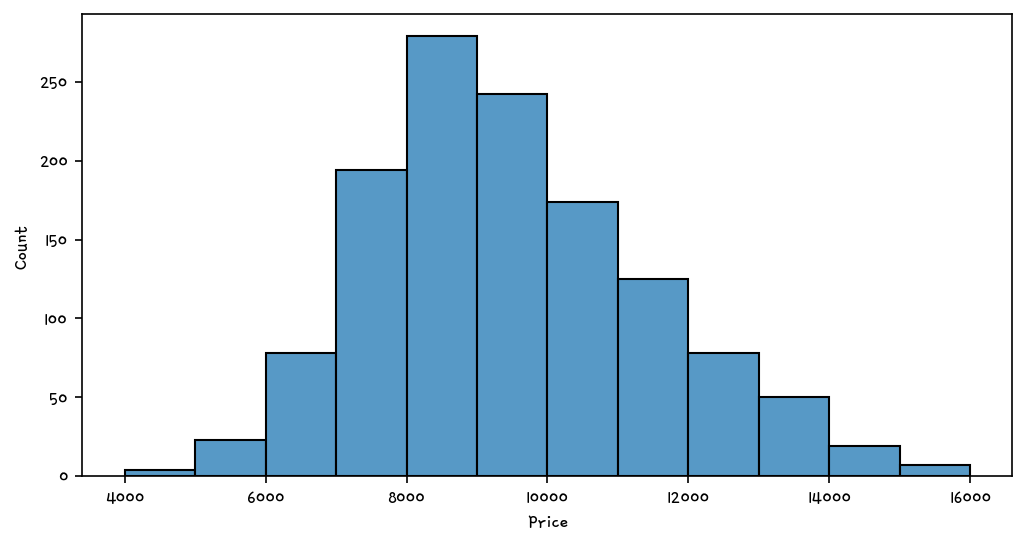

In [32]:
sns.histplot(data = df, x = 'Price', binwidth = 1000, binrange = (4000, 16000));

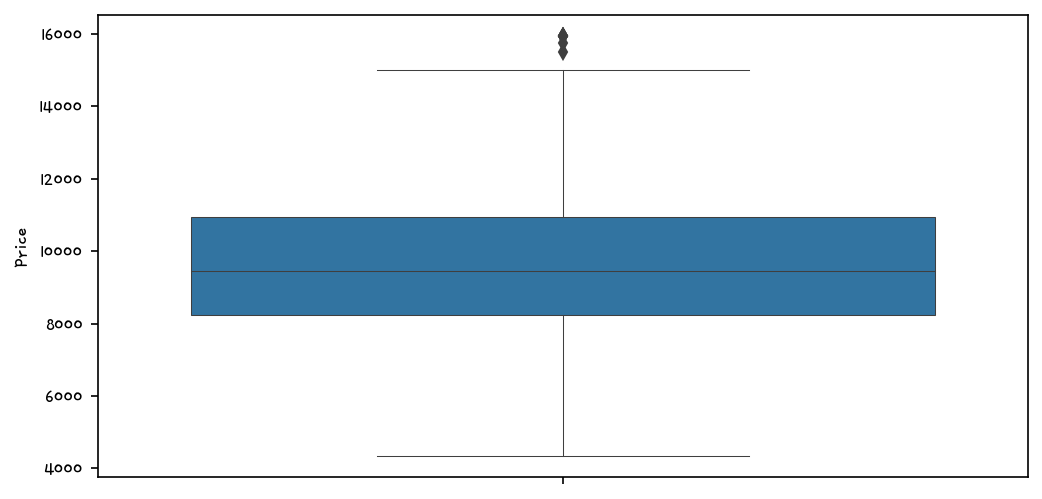

In [33]:
sns.boxplot(data = df, y = 'Price');

In [35]:
plt.rc(group = 'figure', figsize = (4, 4), dpi = 100)

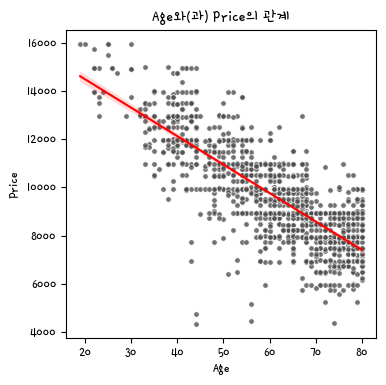

In [36]:
hds.plot_regression(data = df, x = 'Age', y = 'Price')

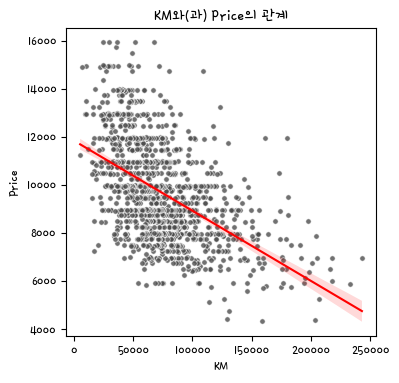

In [37]:
hds.plot_regression(data = df, x = 'KM', y = 'Price')

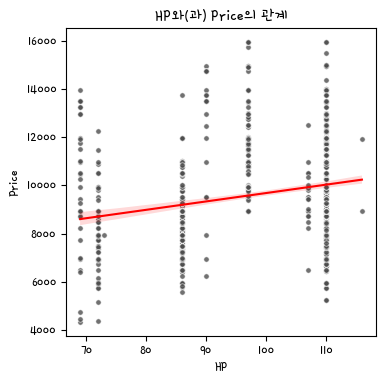

In [38]:
hds.plot_regression(data = df, x = 'HP', y = 'Price')

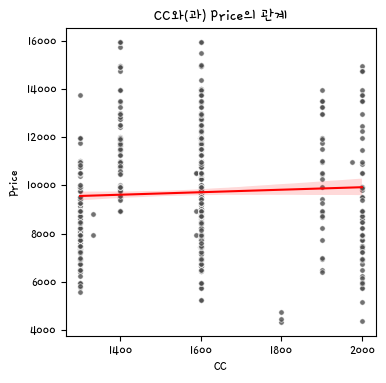

In [39]:
hds.plot_regression(data = df, x = 'CC', y = 'Price')

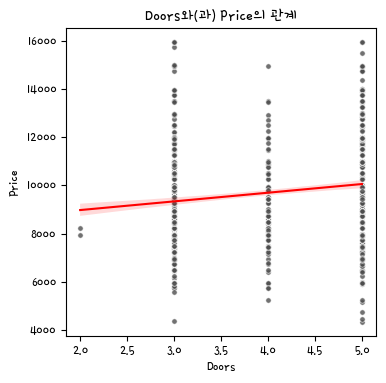

In [40]:
hds.plot_regression(data = df, x = 'Doors', y = 'Price')

In [41]:
df['Doors'].value_counts().sort_index()

2      2
3    571
4    128
5    572
Name: Doors, dtype: int64

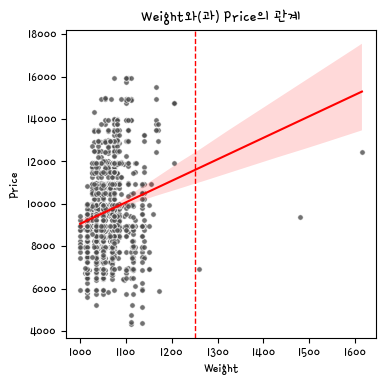

In [45]:
hds.plot_regression(data = df, x = 'Weight', y = 'Price')
plt.axvline(x = 1250, color = 'red', lw = 1, ls = '--');

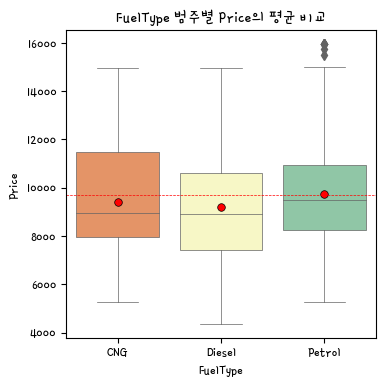

In [48]:
hds.plot_box_group(data = df, x = 'FuelType', y = 'Price', pal = 'Spectral')

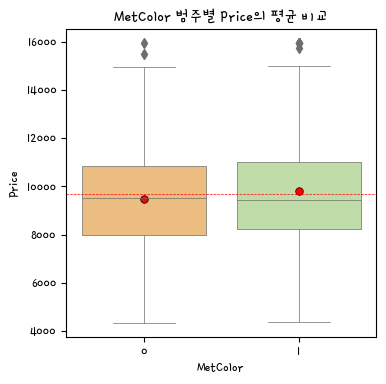

In [49]:
hds.plot_box_group(data = df, x = 'MetColor', y = 'Price', pal = 'Spectral')

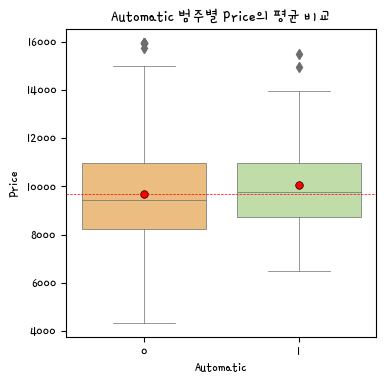

In [50]:
hds.plot_box_group(data = df, x = 'Automatic', y = 'Price', pal = 'Spectral')

In [51]:
df = df[df['Doors'].ne(2) & df['Weight'].le(1250)]

In [52]:
df = df.reset_index(drop = True)

In [53]:
df.shape[0]

1268

In [54]:
df.to_excel('Used_Cars_Price.xlsx', index = None)

In [55]:
df.to_csv('Used_Cars_Price.csv', index = None)

In [56]:
joblib.dump(value = df, filename = 'Used_Cars_Price.z')

['Used_Cars_Price.z']

In [57]:
from scipy import stats
from statsmodels import robust

In [58]:
os.listdir()

['APT_List_Seoul_2021.csv',
 'APT_List_Seoul_2021.xlsx',
 'APT_List_Seoul_2021.z',
 'APT_Mean_Price_Dong_2021.xlsx',
 'APT_Price_Seoul_2021.csv',
 'APT_Price_Seoul_2021.xlsx',
 'KBO_Hitters_2021.csv',
 'KBO_Hitters_2021.xlsx',
 'Naver_APT_Detail_Seoul.csv',
 'Naver_APT_Detail_Seoul.xlsx',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z']

In [59]:
df = pd.read_excel('Used_Cars_Price.xlsx')

In [60]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
dtype: object

In [61]:
df = joblib.load('Used_Cars_Price.z')

In [62]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

In [63]:
df['Price'].mean()

9696.851

In [64]:
stats.trim_mean(df['Price'], 0.1)

9591.892

In [65]:
df['Price'].median()

9487.500

In [66]:
stats.trim_mean(df['Price'], 0.5)

C:\Users\15U40N\Venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\15U40N\Venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [67]:
df['Price'].quantile(np.linspace(0, 1, 100+1))

0.00     4350.00
0.01     5830.15
0.02     5950.00
0.03     6495.05
0.04     6650.00
          ...   
0.96    13580.00
0.97    13950.00
0.98    14229.30
0.99    14950.00
1.00    15950.00
Name: Price, Length: 101, dtype: float64

In [68]:
df['Price'].quantile(np.linspace(0, 1, 10+1))

0.0     4350.0
0.1     7250.0
0.2     7950.0
0.3     8500.0
0.4     8950.0
0.5     9487.5
0.6     9950.0
0.7    10500.0
0.8    11468.0
0.9    12500.0
1.0    15950.0
Name: Price, dtype: float64

In [69]:
df['Price'].quantile(np.linspace(0, 1, 4+1))

0.00     4350.0
0.25     8250.0
0.50     9487.5
0.75    10950.0
1.00    15950.0
Name: Price, dtype: float64

In [ ]:
quants = df['Price'].quantile(np.linspace(0, 1, 4+1))
[[df['Price'].lt(quant)] for quant in quants]

In [70]:
df['Price'].max()

15950

In [71]:
df['Price'].min()

4350

In [72]:
df['Price'].max() - df['Price'].min()

11600

In [73]:
df['Price'].quantile([0, 1])

0.0     4350.0
1.0    15950.0
Name: Price, dtype: float64

In [74]:
df['Price'].quantile([0, 1]).diff()

0.0        NaN
1.0    11600.0
Name: Price, dtype: float64

In [75]:
df['Price'].quantile([0, 1]).diff().iloc[-1]

11600.000

In [76]:
df['Price'].quantile([0.25, 0.75]).diff().iloc[-1]

2700.000

In [78]:
df['FuelType'].mode()

0    Petrol
Name: FuelType, dtype: object

In [79]:
df['Price'].var()

4117236.370

In [80]:
df['Price'].std()

2029.097

In [81]:
robust.mad(df['Price'])

2168.306

In [84]:
df.mean()

C:\Users\15U40N\AppData\Local\Temp\ipykernel_9360\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Price        9.697e+03
Age          6.059e+01
KM           7.374e+04
HP           1.004e+02
MetColor           inf
Automatic          inf
CC           1.559e+03
Doors        4.002e+00
Weight       1.062e+03
dtype: float64

In [83]:
df.mean(numeric_only = True)

Price      9696.851
Age          60.593
KM        73737.629
HP          100.442
CC         1558.816
Doors         4.002
Weight     1061.572
dtype: float64

In [87]:
df.apply('mean', numeric_only = True)

Price      9696.851
Age          60.593
KM        73737.629
HP          100.442
CC         1558.816
Doors         4.002
Weight     1061.572
dtype: float64

In [89]:
df.apply(np.mean)

TypeError: Could not convert DieselDieselDieselDieselDieselDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselCNGDieselDieselDieselDieselDieselPetrolDieselDieselPetrolCNGPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolCNGDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselCNGDieselPetrolDieselCNGDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselDieselCNGDieselPetrolDieselCNGPetrolCNGDieselDieselDieselDieselPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolCNGPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselCNGDieselDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselCNGDieselDieselPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrol to numeric

In [85]:
df.std(numeric_only = True)

Price      2029.097
Age          13.709
KM        35858.332
HP           13.100
CC          183.657
Doors         0.949
Weight       33.839
dtype: float64

In [86]:
df.median(numeric_only = True)

Price      9487.5
Age          63.0
KM        67358.5
HP          110.0
CC         1600.0
Doors         4.0
Weight     1060.0
dtype: float64

In [90]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000
mean,9696.851,60.593,73737.629,100.442,1558.816,4.002,1061.572
std,2029.097,13.709,35858.332,13.100,183.657,0.949,33.839
min,4350.000,19.000,5309.000,69.000,1300.000,3.000,1000.000
25%,8250.000,51.000,48950.250,86.000,1400.000,3.000,1035.000
50%,9487.500,63.000,67358.500,110.000,1600.000,4.000,1060.000
75%,10950.000,72.000,90315.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1205.000


In [91]:
df.describe(include = object)

,FuelType,MetColor,Automatic
count,1268,1268,1268
unique,3,2,2
top,Petrol,1,0
freq,1125,840,1198


In [100]:
np.random.seed(1234)

In [101]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 5000)

In [102]:
heights.mean()

175.121

In [103]:
heights.std()

4.959

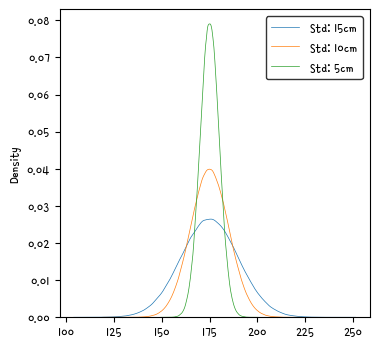

In [105]:
x1 = stats.norm.rvs(loc = 175, scale = 15, size = 1000000)
x2 = stats.norm.rvs(loc = 175, scale = 10, size = 1000000)
x3 = stats.norm.rvs(loc = 175, scale = 5, size = 1000000)

sns.kdeplot(x = x1, label = 'Std: 15cm')
sns.kdeplot(x = x2, label = 'Std: 10cm')
sns.kdeplot(x = x3, label = 'Std: 5cm')
plt.legend();

In [117]:
%precision %r

'%r'

In [114]:
stats.norm.pdf(loc = 175, scale = 15, x = 175)

0.02659615202676218


In [109]:
stats.norm.pdf(loc = 175, scale = 10, x = 175)

0.03989422804014327

In [110]:
stats.norm.pdf(loc = 175, scale = 5, x = 175)

0.07978845608028654

In [118]:
stats.norm.pdf(loc = 175, scale = 5, x = [174, 175, 165]).prod()

6.738222243587733e-05

In [120]:
np.log(stats.norm.pdf(loc = 175, scale = 5, x = [174, 175, 165])).sum()

-9.60512933691632

In [121]:
np.log(stats.norm.pdf(loc = 170, scale = 5, x = [174, 175, 165])).sum()

-8.90512933691632

In [122]:
%precision 3

'%.3f'

In [123]:
stats.norm.cdf(loc = 175, scale = 15, x = 185)

0.748

In [124]:
stats.norm.cdf(loc = 175, scale = 10, x = 185)

0.841

In [125]:
stats.norm.cdf(loc = 175, scale = 5, x = 185)

0.977

In [128]:
np.diff(stats.norm.cdf(loc = 175, scale = 5, x = [165, 185]))

array([0.954])

In [129]:
np.diff(stats.norm.cdf(loc = 175, scale = 5, x = [180, 185]))

array([0.136])

In [130]:
stats.norm.ppf(loc = 175, scale = 15, q = 0.748)

185.023

In [131]:
stats.norm.ppf(loc = 175, scale = 10, q = 0.841)

184.986

In [132]:
stats.norm.ppf(loc = 175, scale = 5, q = 0.977)

184.977

In [133]:
stats.norm.ppf(loc = 175, scale = 5, q = 0.95)

183.224

In [134]:
stats.norm.ppf(loc = 175, scale = 5, q = 0.99)

186.632

In [135]:
stats.norm.cdf(loc = 175, scale = 5, x = 182)

0.919

In [136]:
stats.skew(heights)

-0.037

In [137]:
stats.kurtosis(heights)

-0.071

In [138]:
stats.shapiro(heights)

ShapiroResult(statistic=0.9995919466018677, pvalue=0.396047443151474)

In [139]:
np.random.seed(1234)
heights = stats.norm.rvs(loc = 175, scale = 5, size = 10000)

In [140]:
stats.shapiro(heights)

C:\Users\15U40N\Venv\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996193051338196, pvalue=0.04346244037151337)

In [141]:
stats.anderson(heights)

AndersonResult(statistic=0.35265258232357155, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [142]:
def scale(x, loc, scale):
    return (x - loc) / scale

In [143]:
scale(x = 185, loc = 175, scale = 15)

0.667

In [144]:
scale(x = 185, loc = 175, scale = 10)

1.000

In [145]:
scale(x = 185, loc = 175, scale = 5)

2.000

In [146]:
heights

array([177.357, 169.045, 182.164, ..., 169.738, 172.512, 173.72 ])

In [147]:
stats.zscore(a=heights)

array([ 0.458, -1.213,  1.423, ..., -1.074, -0.516, -0.273])

In [148]:
np.abs(stats.zscore(a=heights))

array([0.458, 1.213, 1.423, ..., 1.074, 0.516, 0.273])

In [149]:
np.abs(stats.zscore(a=heights)) > 3

array([False, False, False, ..., False, False, False])

In [165]:
locs = np.where(np.abs(stats.zscore(a=heights)) > 3)
locs

(array([  81, 1307, 1333, 1670, 2053, 2289, 3136, 3924, 4097, 4477, 4599,
        5274, 5903, 5935, 7040, 7340, 7510, 7743, 8578, 8650, 9406, 9888],
       dtype=int64),)

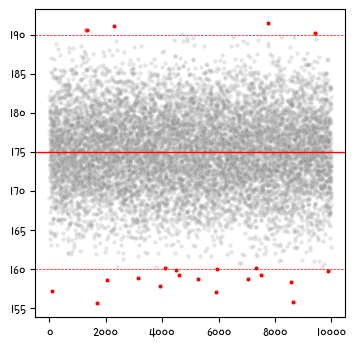

In [170]:
sns.scatterplot(x = range(10000), y = heights, color = '0.5', s = 10, alpha = 0.2)
sns.scatterplot(x = locs[0], y = heights[locs], color = 'red', s = 10, alpha = 1)
plt.axhline(y = 175, color = 'red', lw = 1, ls = '-')
plt.axhline(y = 190, color = 'red', lw = 0.5, ls = '--')
plt.axhline(y = 160, color = 'red', lw = 0.5, ls = '--');

In [171]:
heights = pd.Series(heights)

In [172]:
heights

0       177.357
1       169.045
2       182.164
3       173.437
4       171.397
         ...   
9995    169.760
9996    171.106
9997    169.738
9998    172.512
9999    173.720
Length: 10000, dtype: float64

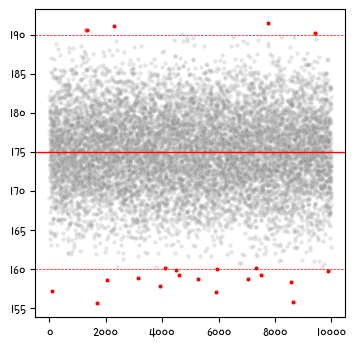

In [175]:
sns.scatterplot(x = heights.index, y = heights, color = '0.5', s = 10, alpha = 0.2)
sns.scatterplot(x = heights.index[locs], y = heights.iloc[locs], color = 'red', s = 10, alpha = 1)
plt.axhline(y = 175, color = 'red', lw = 1, ls = '-')
plt.axhline(y = 190, color = 'red', lw = 0.5, ls = '--')
plt.axhline(y = 160, color = 'red', lw = 0.5, ls = '--');

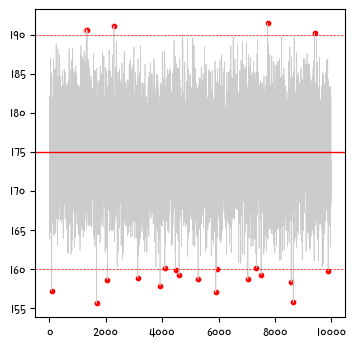

In [178]:
sns.lineplot(x = heights.index, y = heights, color = '0.8')
sns.scatterplot(x = heights.index[locs], y = heights.iloc[locs], color = 'red', 
                s = 20, alpha = 1)
plt.axhline(y = 175, color = 'red', lw = 1, ls = '-')
plt.axhline(y = 190, color = 'red', lw = 0.5, ls = '--')
plt.axhline(y = 160, color = 'red', lw = 0.5, ls = '--');